In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import tools
from chart_studio import plotly
import plotly.figure_factory as ff
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

### Analyzing Amazon Stock Data

### Getting the Data <br>
We downloaded the data in csv format from Yahoo Finance Website. The website provides a rich source of financial market data. 

In [2]:
#loading the file
df_amazon = pd.read_csv("AMZN.csv")
df_amazon.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,5/15/1997,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,5/16/1997,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,5/19/1997,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,5/20/1997,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,5/21/1997,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


In [17]:
df_amazon.shape
print("Total number of rows are:",df_amazon.shape[0])
print("Total number of columns are:",df_amazon.shape[1])

Total number of rows are: 6474
Total number of columns are: 9


In [3]:
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6474 entries, 0 to 6473
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6474 non-null   object 
 1   Open       6474 non-null   float64
 2   High       6474 non-null   float64
 3   Low        6474 non-null   float64
 4   Close      6474 non-null   float64
 5   Adj Close  6474 non-null   float64
 6   Volume     6474 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 354.2+ KB


#### Information About the Data

#### Closing Price <br> 
The closing price is the last price at which stock is traded during the regular trading day. A stock's closing price is the standard benchmark used by investors to track it's performance over time. 

#### Volume of Sales<br>
Volume is the amount of an asset that changes hands over some period of time, often over the course of a day. For instance, the stock trading volumne would refer to the number of share of security trade between it's daily open and close. Trading volume and change to volumne over the course of time are important inputs for technical traders. 



In [25]:
#converting the Date column to Datetime
df_amazon['Date_1'] = pd.to_datetime(df_amazon['Date'])

In [5]:
print("Minimum date value : {}".format(df_amazon['Date_1'].min()))
print("Maximum date value : {}".format(df_amazon['Date_1'].max()))

Minimum date value : 1997-05-15 00:00:00
Maximum date value : 2023-02-03 00:00:00


We have around 26 years of data

**Have a good look at closing prices and date. Most time series analysis go with trying to fo find closing prices. The reason is because closing prices generally summarize the way business was going better than opening prices or average prices.**

In [6]:
print('There are {} number of days in the dataset.'.format(df_amazon.shape[0]))

There are 6474 number of days in the dataset.


Checking for null values in the dataset

In [9]:
df_amazon.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Date_1       0
Month        0
dtype: int64

Fortunately, the dataset does not contain have null values.

Checking for duplicate values

In [14]:
df_amazon[df_amazon.duplicated()]

,Date,Open,High,Low,Close,Adj Close,Volume,Date_1,Month


Summary Stastics

In [38]:
df_amazon.describe()

,Open,High,Low,Close,Adj Close,Volume,Month
count,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6.474000e+03,6474.000000
mean,31.185148,31.559382,30.773725,31.172728,31.172728,1.430776e+08,2009.727989
std,47.956919,48.518132,47.329547,47.920817,47.920817,1.404478e+08,7.432044
min,0.070313,0.072396,0.065625,0.069792,0.069792,9.744000e+06,1997.000000
25%,1.991750,2.023625,1.954750,1.997406,1.997406,6.935250e+07,2003.000000
50%,6.347750,6.421750,6.257000,6.343750,6.343750,1.062200e+08,2010.000000
75%,38.099998,38.299999,37.797749,38.006750,38.006750,1.612745e+08,2016.000000
max,187.199997,188.654007,184.839493,186.570496,186.570496,2.086584e+09,2023.000000


### Exploratory Data Analysis

**Distribution of  column Close**

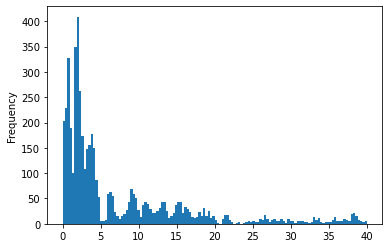

In [45]:
df_amazon['Close'].plot(kind ='hist', bins = 130, range = [0,40])
plt.show()

The distribution of Close is right skewed that means the mean is greater then the median

**Change of Amazon Stock Price since 1997**

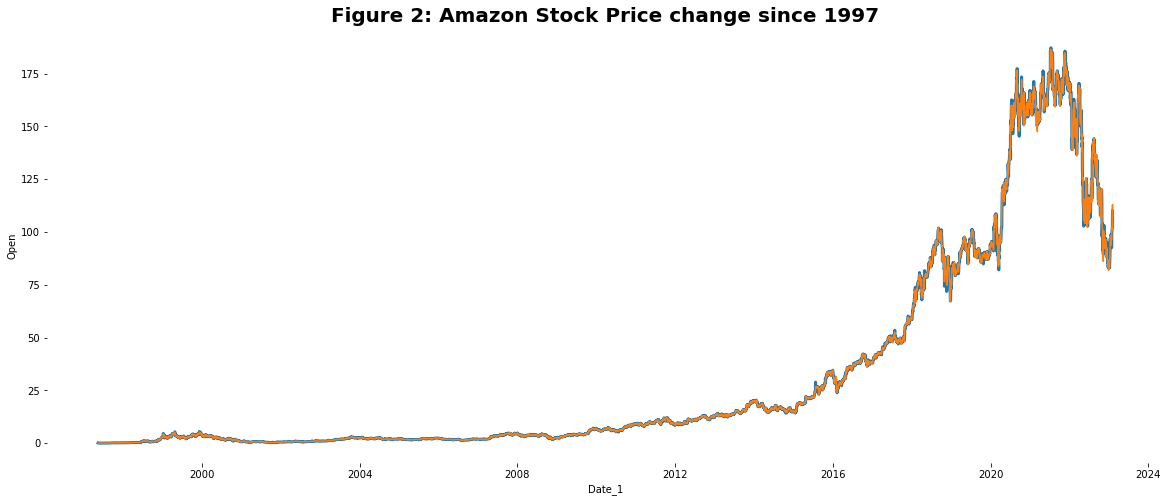

In [7]:
colors = ['#FF9900','#000000']
fig=plt.figure(figsize=(20,8))
ax=sns.lineplot(data= df_amazon, x='Date_1',y='Open', linewidth = 3)
ax=sns.lineplot(data= df_amazon, x='Date_1',y='Close', linewidth = 1.5)
for s in ['left','right','top','bottom']:
    ax.spines[s].set_visible(False)

plt.title("Figure 2: Amazon Stock Price change since 1997", size=20, weight='bold')
plt.show()

- The amazon stock price from the year 1997 to 2010 saw no significant growth
- After year 2010 - exponential growth
- Covid pendamic year 2020 oosted Amazon's stock prices 

Having a closer look from the year 2010 to the year 2022

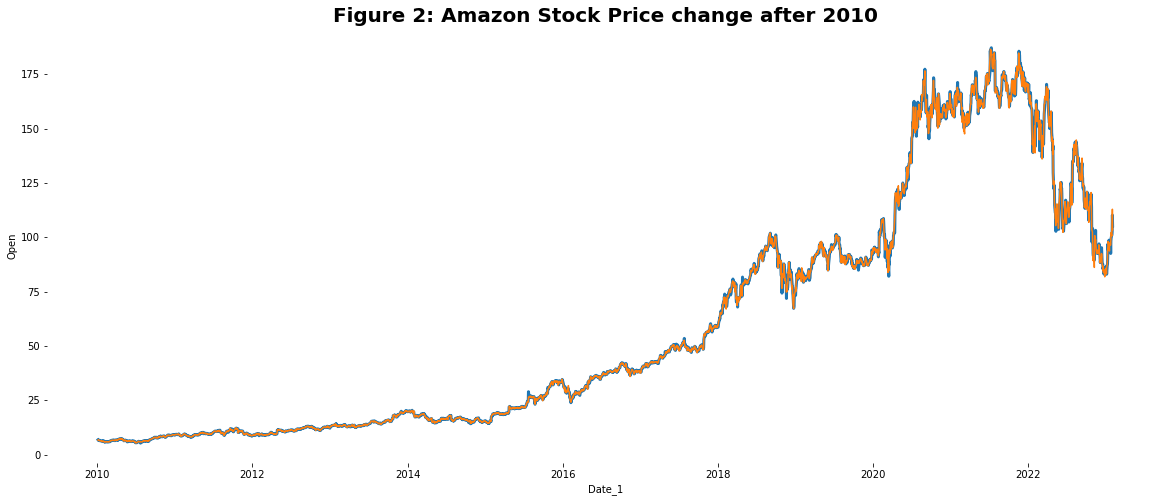

In [27]:
df_amazon['Month']= df_amazon['Date_1'].dt.year
df_month = df_amazon[df_amazon['Month'] >= 2010]


colors = ['#FF9900','#000000']
fig=plt.figure(figsize=(20,8))
ax=sns.lineplot(data= df_month, x='Date_1',y='Open', linewidth = 3)
ax=sns.lineplot(data= df_month, x='Date_1',y='Close', linewidth = 1.5)
for s in ['left','right','top','bottom']:
    ax.spines[s].set_visible(False)

plt.title("Figure 2: Amazon Stock Price change after 2010", size=20, weight='bold')
plt.show()

**Amazon business really boomed after 2010 and then peaked after 2015**

In [20]:
trace = go.Ohlc(x=df_month['Date_1'],
                open=df_month['Open'],
                high=df_month['High'],
                low=df_month['Low'],
                close=df_month['Close'],
               increasing=dict(line=dict(color= '#58FA58')),
                decreasing=dict(line=dict(color= '#FA5858')))

layout = {
    'title': 'Amazon Historical Price',
    'xaxis': {'title': 'Date',
             'rangeslider': {'visible': False}},
    'yaxis': {'title': 'Stock Price (USD$)'},
    'shapes': [{
        'x0': '2016-12-09', 'x1': '2016-12-09',
        'y0': 0, 'y1': 1, 'xref': 'x', 'yref': 'paper',
        'line': {'color': 'rgb(30,30,30)', 'width': 1}
    }],
    
    'annotations': [{
        'x': '2017-01-20', 'y': 0.05, 'xref': 'x', 'yref': 'paper',
        'showarrow': False, 'xanchor': 'left',
        'text': 'President Donald Trump <br> takes Office'
    }]
    
}

data = [trace]

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='simple_ohlc')

**Anomalies**

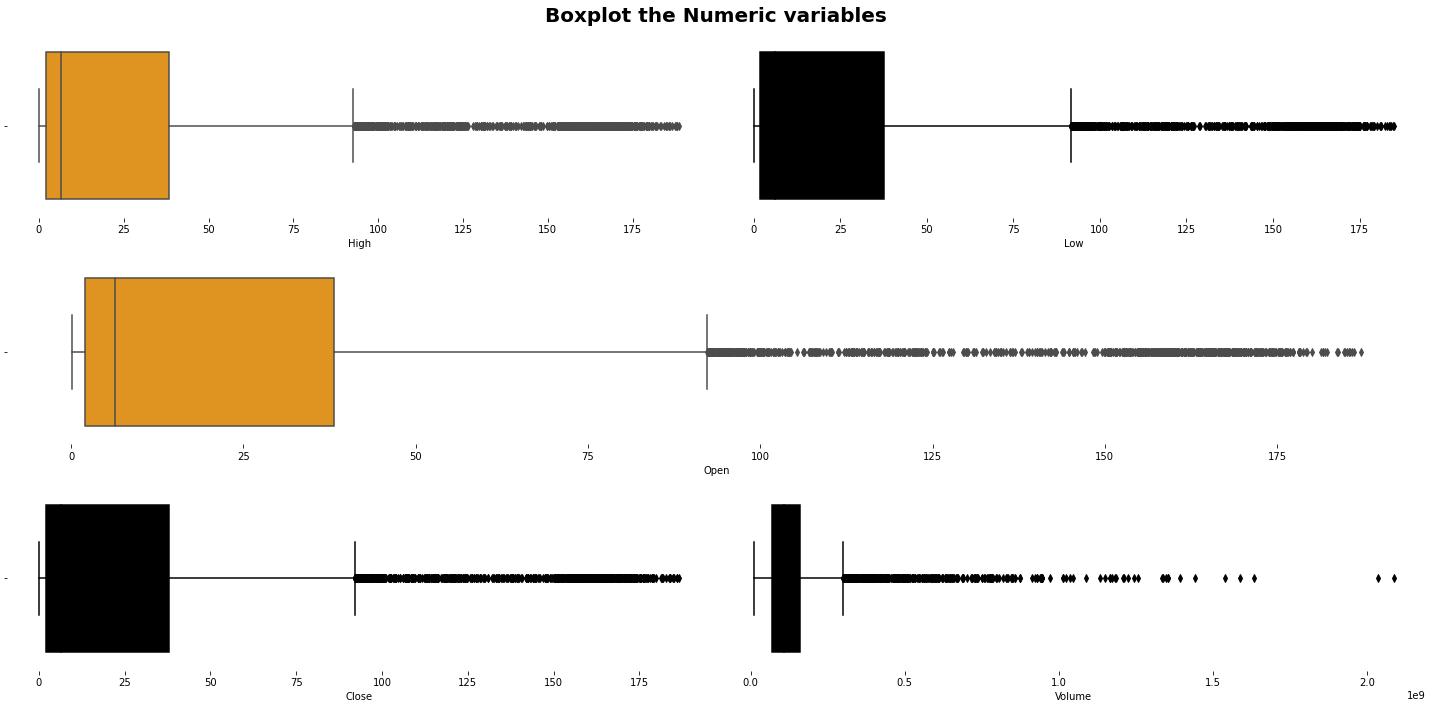

In [21]:
fig=plt.figure(figsize=(20,10), tight_layout=True)
plt.suptitle("Boxplot the Numeric variables", size=20, weight='bold')
ax=fig.subplot_mosaic("""AB
                         CC
                         DE""")
sns.boxplot(df_amazon['High'], ax=ax['A'], color=colors[0])
sns.boxplot(df_amazon['Low'], ax=ax['B'], color=colors[1])
sns.boxplot(df_amazon['Open'], ax=ax['C'], color=colors[0])
sns.boxplot(df_amazon['Close'], ax=ax['D'], color=colors[1])
sns.boxplot(df_amazon['Volume'], ax=ax['E'], color=colors[1])
ax['B'].yaxis.set_visible(False)
ax['E'].yaxis.set_visible(False)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['D'].yaxis.label.set_alpha(0.5)
for s in ['left','right','top','bottom']:
    ax['A'].spines[s].set_visible(False)
    ax['B'].spines[s].set_visible(False)
    ax['C'].spines[s].set_visible(False)
    ax['D'].spines[s].set_visible(False)
    ax['E'].spines[s].set_visible(False)

There seems to be ouliers in the data set, however, those values can't be considered as outlier as they may be extrem values during peak selling days <br>
Date column has been ingored as it is series of numbers

**Moving Average**

A moving average is a metric often used in technical analysis. For a stock, it’s a constantly updated average price. Unlike trying to track a stock price day-to-day, a moving average smooths price volatility and is an indicator of the current direction a price is headed.

In [22]:
# Moving Averages (10, 50 and 200)
df_month['10_d_avg'] = df_month.Close.rolling(window=10).mean()
df_month['50_d_avg'] = df_month.Close.rolling(window=50).mean()
df_month['200_d_avg'] = df_month.Close.rolling(window=200).mean()
close_p = df_month['Close'].values.tolist()


# Variables to insert into plotly
ten_d = df_month['10_d_avg'].values.tolist()
fifty_d = df_month['50_d_avg'].values.tolist()
twoh_d = df_month['200_d_avg'].values.tolist()
date = df_month['Date_1'].values.tolist()

# Set date as index
df_month = df_month.set_index('Date_1')

**Relationship between Moving Average and Closing Price**

In [23]:
fig = tls.make_subplots(rows=2, cols=1, shared_xaxes=True)

colors = ['#ff4500', '#92a1cf', '#6E6E6E']
avgs = ['10_d_avg', '50_d_avg', '200_d_avg']
# for i,c in zip(range(n),color):
#    ax1.plot(x, y,c=c)

for col, c in zip(avgs, colors):
    fig.append_trace({'x': df_month.index, 'y': df_month[col], 'type': 'scatter', 'name': col, 'line': {'color': c}}, 1, 1)
for col in ['Close']:
    fig.append_trace({'x': df_month.index, 'y': df_month[col], 'type': 'scatter', 'name': 'Closing Price', 'line':{'color': '#01DF3A'}}, 2, 1)
    
fig['layout'].update(height=800,title='Relationship between MAs <br> and Closing Price',
                    paper_bgcolor='#F2DFCE', plot_bgcolor='#F2DFCE')
    
iplot(fig, filename='pandas/mixed-type subplots')

In [31]:
# Plotly
trace0 = go.Scatter(
    x = df_month['Date_1'],
    y = ten_d,
    name = '10-day MA',
    line = dict(
        color = ('#ff6347'),
        width = 4)
)
trace1 = go.Scatter(
    x = df_month['Date_1'],
    y = fifty_d,
    name = '50-day MA',
    line = dict(
        color = ('#92a1cf'),
        width = 4,
    dash="dot") )

trace2 = go.Scatter(
    x = df_month['Date_1'],
    y = twoh_d,
    name = '200-day MA',
    line = dict(
        color = ('#2EF688'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
data = [trace0, trace1, trace2]

layout = dict(title = 'Moving Averages for Amazon',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Price'),
              annotations=[dict(
                x='2018-09-28',
                y=100,
                xref='x',
                yref='y',
                text='<i> First major decline <br> after 10-d crosses <br> 50-d moving average </i>',
                showarrow=True,
                arrowhead=5,
                ax=5,
                ay=-50
                  ),
                           dict(
                 x = "2019-01-01",
                y = 85,
                text = "<i>Upward trend after <br> 10-day crosses <br>200-day moving average </i>",
                showarrow=True,
                arrowhead=5,
                textangle = 0,
                    ax = 50,
                   ay = 50,
                  font = dict(
                  color = "black",
                  size = 12
        )
        )],
              paper_bgcolor='#FFF9F5',
              plot_bgcolor='#FFF9F5'
              )
                  
                  

fig = dict(data=data, layout = layout)
iplot(fig, filename='styled-line')

**Importing other files**

Loading the required csv file into pandas

In [47]:
amzn_df=pd.read_csv('amzn.csv')  #contains data day vise

amzn_balance_sheet_df = pd.read_csv('amzn-balance-sheet-quarterly.csv')     #contains data month vise
amzn_cash_flow_df = pd.read_csv('amzn-cash-flow-statement-quarterly.csv')   
amzn_income_statement_df = pd.read_csv('amzn-income-statement-quarterly.csv')
amzn_ratios_df = pd.read_csv('amzn-ratios-quarterly.csv')

The csv files are not properly structured. Created below is a function that restrcutres the dataframe.

In [48]:
def df_structure(df):
    
    '''
    This function takes a dataframe as an argument.
    It return Dataframe that is transposed with proper headers. 
    '''
    
    df = df.transpose()
    df.columns = df.iloc[0]
    df = df[1:]
    return df

In [49]:
#passing each file in the function and giving them a new name
amzn_balance_sheet_df_new = df_structure(amzn_balance_sheet_df)
amzn_cash_flow_df_new = df_structure(amzn_cash_flow_df)
amzn_income_statement_df_new = df_structure(amzn_income_statement_df)
amzn_ratios_df_new = df_structure(amzn_ratios_df)

In [50]:
#Merging 
merged_df = pd.concat([amzn_balance_sheet_df_new, 
                       amzn_cash_flow_df_new, 
                       amzn_income_statement_df_new,
                       amzn_ratios_df_new])

In [52]:
final_df = merged_df[:103]

Taking the file named "AMZN.csv" which contains data day vise and dividing the column "Date_1" (type - datetime) into Quartes

In [64]:
df_amazon_quarter  = df_amazon.groupby(df_amazon['Date_1'].dt.to_period('Q'))['Close'].agg('mean').reset_index()
df_amazon_quarter = df_amazon_quarter[:-1]

#sorting the date column from descending to ascending
df_amazon_quarter.sort_values('Date_1',ascending = False, inplace = True)